In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
df.duplicated('Height').sum()

np.int64(0)

In [5]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


/tmp/ipython-input-4130026880.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

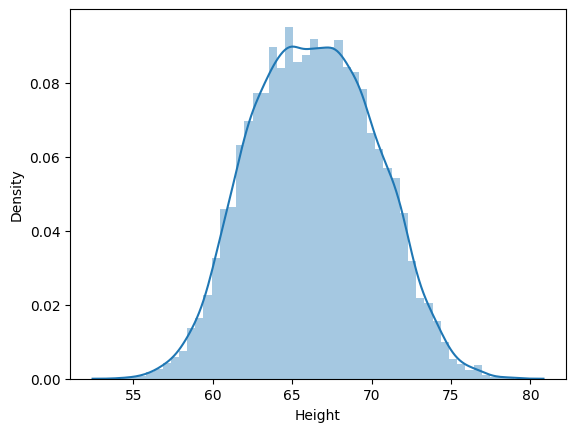

In [6]:
import seaborn as sn
sn.distplot(df['Height'])

#the distribution isshape ofnormally_distributed

<Axes: xlabel='Height'>

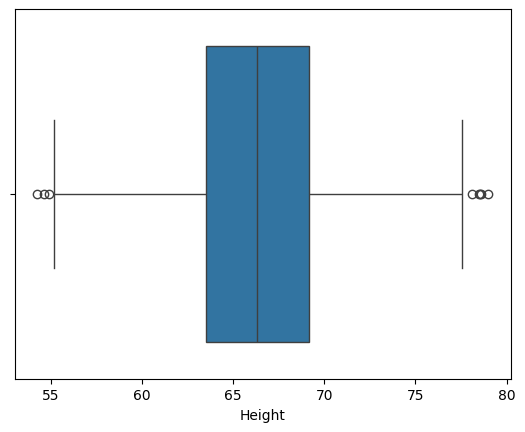

In [7]:
sn.boxplot(x=df['Height'])

In [8]:
# bydefault takes the 50% precentile i.e median

upper_limit=df['Height'].quantile(0.99)
lower_limit=df['Height'].quantile(0.01)
lower_limit , upper_limit
# take +1 -1

(np.float64(58.13441158671655), np.float64(74.7857900583366))

In [9]:
(df['Height'] > upper_limit).sum() , (df['Height'] > lower_limit).sum()


(np.int64(100), np.int64(9900))

In [10]:
df[ (df['Height'] > 74.78) |  (df['Height'] < 58.13) ]

# for 99% tile - (99/100)*10000 = 9900 -(10000) = 100 rows
# for 1%tile - 100 = 200 rows

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


TRIM THE OUTLIERS

In [11]:
df_trim = df[ (df['Height'] <= 74.78) &  (df['Height'] >= 58.13) ]
df_trim

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [12]:
df_trim.describe()

,Height,Weight
count,9799.000000,9799.000000
mean,66.363507,161.391522
std,3.644267,30.925072
min,58.134496,77.523774
25%,63.577147,136.320936
50%,66.317899,161.201891
75%,69.119859,186.747036
max,74.767447,249.946283


In [13]:
# just slit diff in %tile
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


/tmp/ipython-input-3796869948.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df_trim['Height'])


<Axes: xlabel='Height', ylabel='Density'>

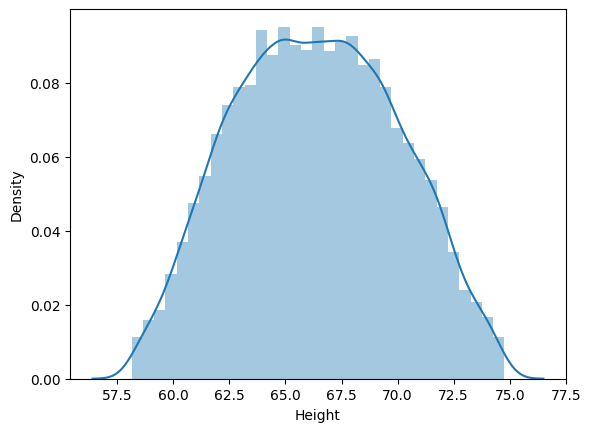

In [14]:
sn.distplot(df_trim['Height'])

<Axes: xlabel='Height'>

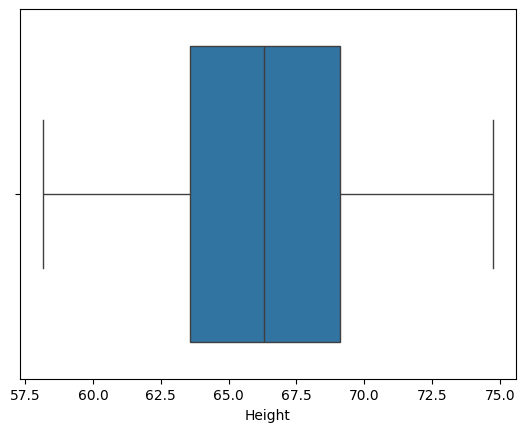

In [15]:
# outliers gotcompletley_removed
sn.boxplot(x=df_trim['Height'])

CAPPING THE OUTLIERS - WINSORIZATION

In [16]:
import numpy as np

df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))
# np.where so itwill_return the array



In [19]:
df.iloc[23]
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.366281,161.440357
std,3.795717,32.108439
min,58.134412,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,74.785790,269.989699


/tmp/ipython-input-3525762405.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

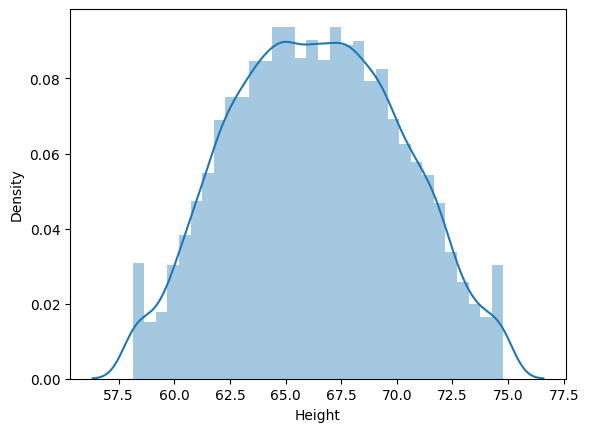

In [22]:
sn.distplot(df['Height'])

# frombottom_ithas pumped

<Axes: xlabel='Height'>

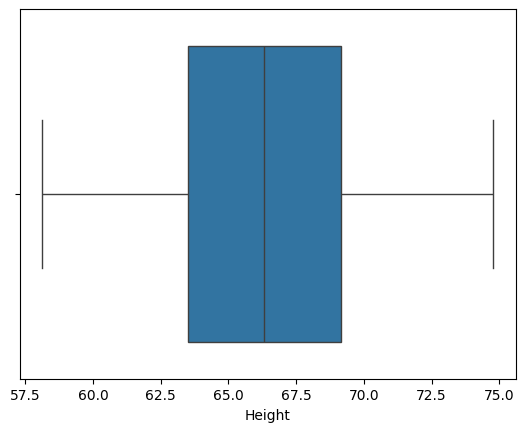

In [25]:
sn.boxplot(x=df['Height'])